In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-networking-ads/Social_Network_Ads.csv


In [45]:
df = pd.read_csv('/kaggle/input/social-networking-ads/Social_Network_Ads.csv')

In [46]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [48]:
X = df.iloc[:,2:4]
y = df.iloc[:,-1]
print(X)
y

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [53]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [99]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Input,Flatten

In [100]:
model = Sequential()

In [101]:
model.add(Dense(10,activation='relu',input_shape=(2,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [102]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
X_train.shape

(320, 2)

In [104]:
model.compile(loss ='binary_crossentropy',metrics=['accuracy'])
import time
start = time.time()
history = model.fit(X_train,y_train,epochs = 40,batch_size = 320)
print(time.time() - start)

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - accuracy: 0.3531 - loss: 6538.8643
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3531 - loss: 5947.4541
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3531 - loss: 5515.1768
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3531 - loss: 5151.0244
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3531 - loss: 4826.0698
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3531 - loss: 4526.8789
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3531 - loss: 4245.9619
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3531 - loss: 3978.6577
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3531 - loss: 3721.8406
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3531 - loss: 3473.3086
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3531 - loss: 3231.4341
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step -

In [105]:
y_test

373    1
268    1
25     1
259    1
177    0
      ..
51     0
330    0
26     1
3      0
348    0
Name: Purchased, Length: 80, dtype: int64

In [106]:
y_pred = model.predict(X_test)
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.8039351e-36],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.8689388e-36],
       [0.000000

In [107]:
import numpy as np

y_pred = np.where(y_pred > 0.5, 1, 0)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.625

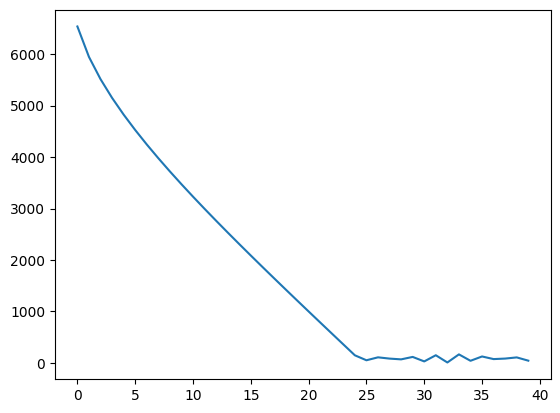

In [109]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [110]:
model.compile(loss ='binary_crossentropy',metrics=['accuracy'])
import time
start = time.time()
history = model.fit(X_train,y_train,epochs =10,batch_size = 1)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4642 - loss: 147.0209
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5390 - loss: 127.6960
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4934 - loss: 138.6506
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5254 - loss: 122.8971
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5189 - loss: 134.6494
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5433 - loss: 112.0285
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5421 - loss: 114.6191
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5531 - loss: 110.2318
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5800 - loss: 98.0654
Epoch 10/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4544 - loss: 109.3066
5.104444980621338


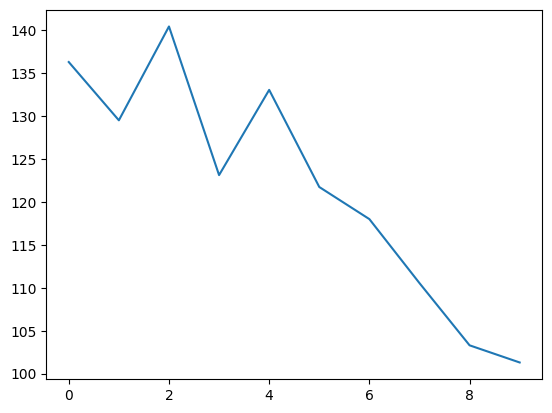

In [111]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])